<a href="https://colab.research.google.com/github/d4vid2025/challenge3-data-science-LATAM-/blob/main/Copy_of_TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)
df_expanded = pd.json_normalize(df.to_dict(orient="records")) #Necesita un diccionario nativo para comenzar a aplanar los datos
df_expanded.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3221,4500-HKANN,No,Male,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,No,Mailed check,59.70,1414.2
3712,5124-EOGYE,No,Male,0,No,No,31,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,638.55
6933,9548-ZMVTX,No,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),90.45,6565.85
2851,3956-CJUST,No,Female,1,No,No,23,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.40,1643.55
3283,4578-PHJYZ,No,Male,0,Yes,Yes,52,Yes,No,DSL,...,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,68.75,3482.85


#🔧 Transformación

## Renombrando columnas

In [3]:
df_expanded.columns = [col.replace(".", "_").lower() for col in df_expanded.columns]
df_expanded

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## Verificando si hay valores nulos/ausentes/nan

In [4]:

cols_str = df_expanded.select_dtypes(include='object').columns


df_expanded[cols_str] = df_expanded[cols_str].apply(lambda x: x.str.strip())

In [5]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

## Verificando si hay valores duplicados

In [6]:
duplicados = df_expanded.duplicated()
duplicados.sum()

np.int64(0)

## Inconsistencias datos no corresponde

In [7]:
columnas_de_interes = list(df_expanded.columns)
columnas_de_interes

['customerid',
 'churn',
 'customer_gender',
 'customer_seniorcitizen',
 'customer_partner',
 'customer_dependents',
 'customer_tenure',
 'phone_phoneservice',
 'phone_multiplelines',
 'internet_internetservice',
 'internet_onlinesecurity',
 'internet_onlinebackup',
 'internet_deviceprotection',
 'internet_techsupport',
 'internet_streamingtv',
 'internet_streamingmovies',
 'account_contract',
 'account_paperlessbilling',
 'account_paymentmethod',
 'account_charges_monthly',
 'account_charges_total']

In [8]:
valores_unicos = {col: df_expanded[col].unique() for col in df_expanded.columns}
valores_unicos

{'customerid': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
        '9993-LHIEB', '9995-HOTOH'], dtype=object),
 'churn': array(['No', 'Yes', ''], dtype=object),
 'customer_gender': array(['Female', 'Male'], dtype=object),
 'customer_seniorcitizen': array([0, 1]),
 'customer_partner': array(['Yes', 'No'], dtype=object),
 'customer_dependents': array(['Yes', 'No'], dtype=object),
 'customer_tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'phone_phoneservice': array(['Yes', 'No'], dtype=object),
 'phone_multiplelines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'internet_internetservice': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'internet_onlinesecuri

In [9]:
vacios = (df_expanded == '').sum()
vacios

,0
customerid,0
churn,224
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


In [10]:
df_expanded.replace('', np.nan, inplace=True)
vacios = (df_expanded == '').sum()
vacios

,0
customerid,0
churn,0
customer_gender,0
customer_seniorcitizen,0
customer_partner,0
customer_dependents,0
customer_tenure,0
phone_phoneservice,0
phone_multiplelines,0
internet_internetservice,0


In [11]:
datos_limpio = df_expanded.copy()

In [12]:
datos_limpio = df_expanded.dropna()
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   object 
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

## Inconsistencias cruce entre columnas

In [13]:
internet_cols = list(datos_limpio.columns[9:15])

In [14]:
mask = datos_limpio["internet_internetservice"] == "No"

In [15]:
inconsistencias = datos_limpio.loc[mask, internet_cols].apply(lambda x: x != "No internet service")
inconsistencias.head(10)

,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv
20,True,False,False,False,False,False
23,True,False,False,False,False,False
24,True,False,False,False,False,False
27,True,False,False,False,False,False
28,True,False,False,False,False,False
29,True,False,False,False,False,False
32,True,False,False,False,False,False
34,True,False,False,False,False,False
36,True,False,False,False,False,False
39,True,False,False,False,False,False


In [16]:
inconsistencias.any().any()

np.True_

## Creacion de cuentas diarias

In [17]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   object 
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

In [18]:
datos_limpio['cuenta_diarias'] = (datos_limpio['account_charges_monthly'] / 30).round(2)
datos_limpio.sample(5)

/tmp/ipython-input-3714768279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpio['cuenta_diarias'] = (datos_limpio['account_charges_monthly'] / 30).round(2)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
6442,8853-TZDGH,No,Female,0,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.60,8012.75,3.72
5537,7587-AOVVU,No,Male,0,Yes,Yes,27,Yes,Yes,Fiber optic,...,No,Yes,Yes,No,Month-to-month,No,Electronic check,100.75,2793.55,3.36
6047,8257-RZAHR,Yes,Female,0,Yes,No,14,Yes,Yes,DSL,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),64.70,941,2.16
1824,2599-CZABP,No,Male,0,Yes,No,14,Yes,No,DSL,...,No,No,No,No,One year,No,Electronic check,44.60,641.25,1.49


In [19]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   object 
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

In [20]:
listas_a_cambiar = ['churn','phone_phoneservice','account_paperlessbilling']

In [21]:
datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].applymap(
    lambda x: 1 if x == "Yes" else 0 if x == "No" else x
)
datos_limpio.sample(5)

/tmp/ipython-input-3799606484.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].applymap(
/tmp/ipython-input-3799606484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].applymap(


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
2563,3572-UUHRS,0,Male,0,No,No,45,1,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic),18.85,867.3,0.63
2988,4140-MUHUG,1,Female,1,No,No,3,1,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,1,Electronic check,86.85,220.95,2.90
1514,2180-DXNEG,1,Female,0,No,No,12,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,96.00,1062.1,3.20
4866,6653-CBBOM,1,Female,0,No,No,1,1,No,Fiber optic,...,No,No,No,No,Month-to-month,1,Electronic check,70.30,70.3,2.34
2562,3572-UOLYZ,0,Female,0,No,Yes,46,1,Yes,Fiber optic,...,Yes,Yes,No,No,Month-to-month,1,Bank transfer (automatic),84.80,3958.85,2.83


In [22]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   int64  
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   int64  
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

In [23]:
datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].astype(np.int8)
datos_limpio.sample(10)

/tmp/ipython-input-2273685150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpio[listas_a_cambiar] = datos_limpio[listas_a_cambiar].astype(np.int8)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
3331,4635-EJYPD,0,Male,0,Yes,Yes,32,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,18.95,613.95,0.63
5588,7636-OWBPG,0,Male,1,No,No,12,0,No phone service,DSL,...,No,No,No,No,Month-to-month,1,Credit card (automatic),29.35,381.2,0.98
2902,4020-KIUDI,0,Male,0,Yes,Yes,6,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Credit card (automatic),19.85,138.85,0.66
1276,1837-YQUCE,0,Female,0,No,No,70,0,No phone service,DSL,...,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),58.35,4214.25,1.94
3326,4631-OACRM,1,Male,1,No,No,15,1,No,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,79.40,1156.1,2.65
1224,1751-NCDLI,0,Male,1,Yes,No,46,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.85,4564.9,3.30
2498,3487-EARAT,0,Female,0,Yes,Yes,70,1,No,DSL,...,Yes,Yes,No,Yes,One year,0,Credit card (automatic),74.10,5222.3,2.47
5808,7945-PRBVF,0,Male,0,No,No,35,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),21.45,705.45,0.72
5225,7130-VTEWQ,1,Female,1,No,No,8,1,Yes,Fiber optic,...,No,No,No,No,Month-to-month,1,Electronic check,75.75,606.25,2.52
182,0285-INHLN,0,Male,0,Yes,Yes,27,1,No,DSL,...,No,No,No,No,Month-to-month,1,Credit card (automatic),54.75,1510.3,1.82


In [24]:
datos_limpio['account_charges_total']

,account_charges_total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7262,742.9
7263,1873.7
7264,92.75
7265,4627.65


In [25]:
filas_vacias = datos_limpio[datos_limpio['account_charges_total'].str.strip() == '']
filas_vacias

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias


In [26]:
datos_limpio['account_charges_total'].astype(np.float64)
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7032 non-null   object 
 1   churn                      7032 non-null   int8   
 2   customer_gender            7032 non-null   object 
 3   customer_seniorcitizen     7032 non-null   int64  
 4   customer_partner           7032 non-null   object 
 5   customer_dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_phoneservice         7032 non-null   int8   
 8   phone_multiplelines        7032 non-null   object 
 9   internet_internetservice   7032 non-null   object 
 10  internet_onlinesecurity    7032 non-null   object 
 11  internet_onlinebackup      7032 non-null   object 
 12  internet_deviceprotection  7032 non-null   object 
 13  internet_techsupport       7032 non-null   object 
 1

 # Model Predictivo

## Eliminando columnas irrelevantes

In [27]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

In [28]:
datos_limpio = datos_limpio.drop(columns=["customerid"])


In [29]:
datos_limpio.sample(10)

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
4312,1,Female,0,Yes,No,19,1,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,0,Mailed check,89.65,1761.05,2.99
5933,0,Male,0,Yes,Yes,48,1,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,0,Credit card (automatic),111.80,5443.65,3.73
689,0,Female,0,No,No,3,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,0,Mailed check,29.20,98.5,0.97
2456,0,Female,0,Yes,Yes,14,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.50,272,0.65
2203,0,Male,0,Yes,No,3,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,0,Credit card (automatic),29.80,94.4,0.99
477,0,Female,0,Yes,Yes,72,1,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,1,Credit card (automatic),116.40,8543.25,3.88
1597,0,Female,1,Yes,No,57,1,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,0,Credit card (automatic),94.00,5438.95,3.13
6835,0,Female,0,No,No,2,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Bank transfer (automatic),18.75,53.15,0.62
1691,1,Male,1,Yes,Yes,8,1,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,1,Credit card (automatic),80.45,583.45,2.68
2827,0,Female,0,No,Yes,26,1,Yes,DSL,No,...,No,No,No,No,Month-to-month,1,Mailed check,49.50,1265.65,1.65


In [30]:
valores_unicos = {col: datos_limpio[col].unique() for col in datos_limpio.columns}
valores_unicos

{'churn': array([0, 1], dtype=int8),
 'customer_gender': array(['Female', 'Male'], dtype=object),
 'customer_seniorcitizen': array([0, 1]),
 'customer_partner': array(['Yes', 'No'], dtype=object),
 'customer_dependents': array(['Yes', 'No'], dtype=object),
 'customer_tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
        64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
        18, 51, 38, 42]),
 'phone_phoneservice': array([1, 0], dtype=int8),
 'phone_multiplelines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'internet_internetservice': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'internet_onlinesecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'internet_onlinebackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'internet_d

In [31]:
tri_map = {"No": 0, "Yes": 1, "No internet service": 2,"No phone service":2}

cols_internet = [
    "customer_dependents",
    "phone_multiplelines",
    "internet_onlinesecurity",
    "internet_onlinebackup",
    "internet_deviceprotection",
    "internet_techsupport",
    "internet_streamingtv",
    "internet_streamingmovies",
    "customer_partner"
]

for col in cols_internet:
    datos_limpio[col] = datos_limpio[col].map(tri_map)

In [32]:
datos_limpio["customer_gender"] = datos_limpio["customer_gender"].map({"Female": 0, "Male": 1})
datos_limpio

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
0,0,0,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.3,2.19
1,0,1,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4,2.00
2,1,1,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,1,1,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,1,0,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.9,1.84
7263,1,1,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,2.84
7264,0,1,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,0,1,0,1,1,67,1,0,DSL,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [33]:
datos_limpio['phone_multiplelines'].unique()

array([0, 1, 2])

In [34]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7032 non-null   int8   
 1   customer_gender            7032 non-null   int64  
 2   customer_seniorcitizen     7032 non-null   int64  
 3   customer_partner           7032 non-null   int64  
 4   customer_dependents        7032 non-null   int64  
 5   customer_tenure            7032 non-null   int64  
 6   phone_phoneservice         7032 non-null   int8   
 7   phone_multiplelines        7032 non-null   int64  
 8   internet_internetservice   7032 non-null   object 
 9   internet_onlinesecurity    7032 non-null   int64  
 10  internet_onlinebackup      7032 non-null   int64  
 11  internet_deviceprotection  7032 non-null   int64  
 12  internet_techsupport       7032 non-null   int64  
 13  internet_streamingtv       7032 non-null   int64  
 1

In [35]:
datos_limpio['account_contract'] = datos_limpio['account_contract'].map({
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2
})
datos_limpio['account_paymentmethod'] =datos_limpio['account_paymentmethod'].map({
    "Electronic check": 0,
    "Mailed check": 1,
    "Bank transfer (automatic)": 2,
    "Credit card (automatic)": 3
})

In [36]:
datos_limpio['account_charges_total']=datos_limpio['account_charges_total'].astype(np.float64)

In [37]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7032 non-null   int8   
 1   customer_gender            7032 non-null   int64  
 2   customer_seniorcitizen     7032 non-null   int64  
 3   customer_partner           7032 non-null   int64  
 4   customer_dependents        7032 non-null   int64  
 5   customer_tenure            7032 non-null   int64  
 6   phone_phoneservice         7032 non-null   int8   
 7   phone_multiplelines        7032 non-null   int64  
 8   internet_internetservice   7032 non-null   object 
 9   internet_onlinesecurity    7032 non-null   int64  
 10  internet_onlinebackup      7032 non-null   int64  
 11  internet_deviceprotection  7032 non-null   int64  
 12  internet_techsupport       7032 non-null   int64  
 13  internet_streamingtv       7032 non-null   int64  
 1

In [38]:
datos_limpio = datos_limpio.drop(columns=["internet_internetservice"])

In [39]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7032 non-null   int8   
 1   customer_gender            7032 non-null   int64  
 2   customer_seniorcitizen     7032 non-null   int64  
 3   customer_partner           7032 non-null   int64  
 4   customer_dependents        7032 non-null   int64  
 5   customer_tenure            7032 non-null   int64  
 6   phone_phoneservice         7032 non-null   int8   
 7   phone_multiplelines        7032 non-null   int64  
 8   internet_onlinesecurity    7032 non-null   int64  
 9   internet_onlinebackup      7032 non-null   int64  
 10  internet_deviceprotection  7032 non-null   int64  
 11  internet_techsupport       7032 non-null   int64  
 12  internet_streamingtv       7032 non-null   int64  
 13  internet_streamingmovies   7032 non-null   int64  
 1

## Proporción y desbalance

In [40]:
evasion = datos_limpio['churn'].value_counts()
evasion

,count
churn,
0,5163
1,1869


### Aplicamos SMOOTE

In [41]:
from imblearn.over_sampling import SMOTE

X = datos_limpio.drop('churn', axis=1)
y = datos_limpio['churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [42]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10326 entries, 0 to 10325
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_gender            10326 non-null  int64  
 1   customer_seniorcitizen     10326 non-null  int64  
 2   customer_partner           10326 non-null  int64  
 3   customer_dependents        10326 non-null  int64  
 4   customer_tenure            10326 non-null  int64  
 5   phone_phoneservice         10326 non-null  int8   
 6   phone_multiplelines        10326 non-null  int64  
 7   internet_onlinesecurity    10326 non-null  int64  
 8   internet_onlinebackup      10326 non-null  int64  
 9   internet_deviceprotection  10326 non-null  int64  
 10  internet_techsupport       10326 non-null  int64  
 11  internet_streamingtv       10326 non-null  int64  
 12  internet_streamingmovies   10326 non-null  int64  
 13  account_contract           10326 non-null  int

In [54]:
datos_limpio.sample(5)

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
1995,0,0,0,1,1,72,1,1,1,0,1,0,1,0,2,1,2,71.45,5025.85,2.38
1746,0,0,0,1,0,1,1,0,2,2,2,2,2,2,0,1,1,20.65,20.65,0.69
1415,0,0,0,0,0,29,1,1,1,1,0,1,0,0,0,0,1,67.45,1801.10,2.25
4698,0,1,1,1,0,65,1,1,1,1,0,0,1,0,2,1,3,92.70,5968.40,3.09
2572,0,0,0,1,0,57,1,1,0,1,1,1,1,0,1,0,2,74.60,4368.95,2.49


## Correlacion


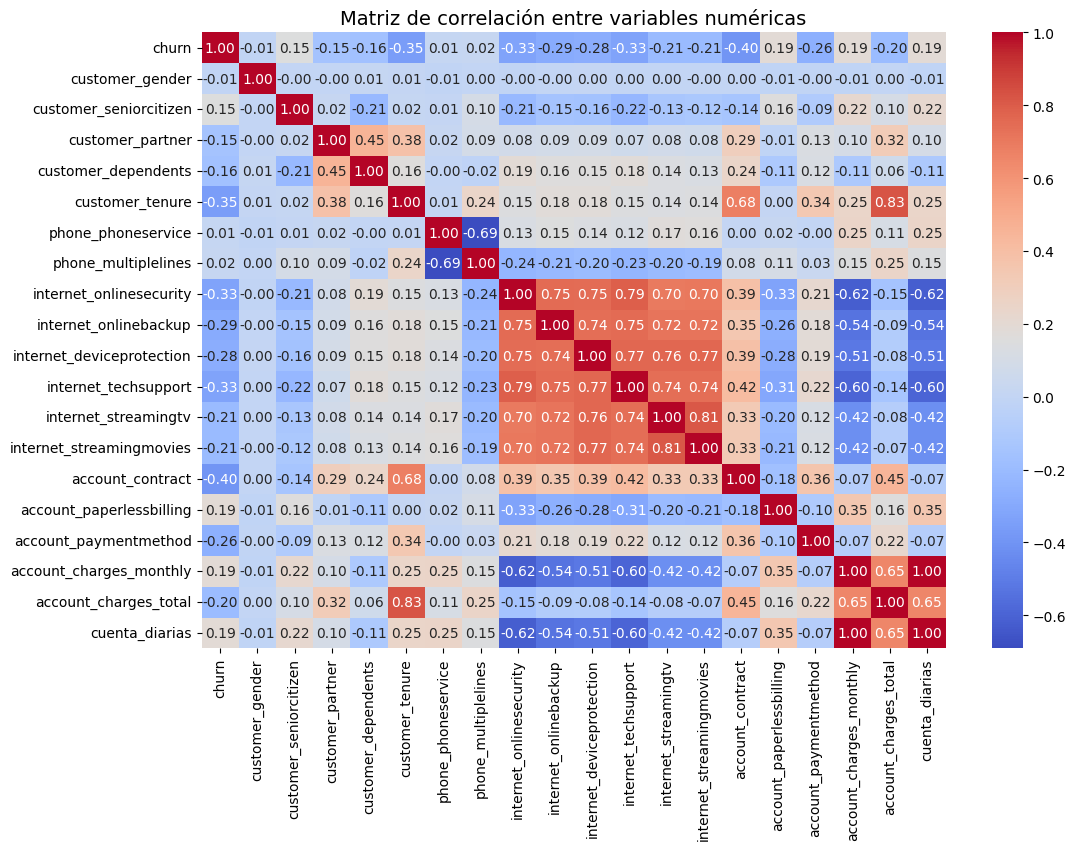

In [52]:
corr_matrix = datos_limpio.corr()

# Visualizamos con un mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación entre variables numéricas", fontsize=14)
plt.show()

In [53]:
corr_churn = corr_matrix["churn"].sort_values(ascending=False)
print(corr_churn)

churn                        1.000000
cuenta_diarias               0.192914
account_charges_monthly      0.192858
account_paperlessbilling     0.191454
customer_seniorcitizen       0.150541
phone_multiplelines          0.019609
phone_phoneservice           0.011691
customer_gender             -0.008545
customer_partner            -0.149982
customer_dependents         -0.163128
account_charges_total       -0.199484
internet_streamingtv        -0.205246
internet_streamingmovies    -0.207150
account_paymentmethod       -0.262918
internet_deviceprotection   -0.281048
internet_onlinebackup       -0.291047
internet_techsupport        -0.329474
internet_onlinesecurity     -0.332443
customer_tenure             -0.354049
account_contract            -0.396150
Name: churn, dtype: float64


### Especificas variables

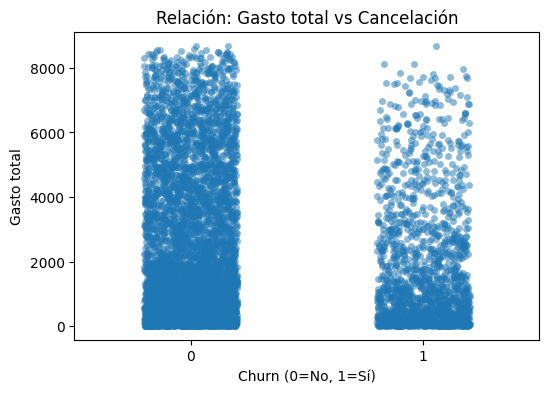

In [58]:
plt.figure(figsize=(6,4))
sns.stripplot(x="churn", y="account_charges_total", data=datos_limpio, alpha=0.5, jitter=0.2)
plt.title("Relación: Gasto total vs Cancelación")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.ylabel("Gasto total")
plt.show()

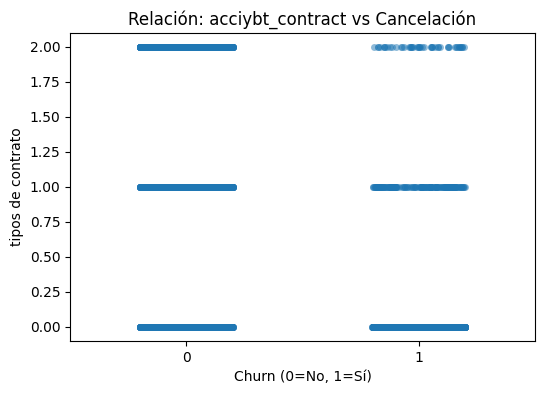

In [60]:
plt.figure(figsize=(6,4))
sns.stripplot(x="churn", y="account_contract", data=datos_limpio, alpha=0.5, jitter=0.2)
plt.title("Relación: acciybt_contract vs Cancelación")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.ylabel("tipos de contrato")
plt.show()

#📊 Carga y análisis

## Analizando Evasion

### Estructura de la evasion

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
evasion = datos_limpio['churn'].value_counts()
evasion

,count
churn,
0,5163
1,1869


In [ ]:
evasion = datos_limpio['churn'].value_counts(normalize=True)
evasion

,proportion
churn,
0,0.734215
1,0.265785


In [ ]:
def graficar_pie(serie, titulo='', figsize=(5,5), colores=None, archivo=None):



    serie.plot.pie(
        labels=serie.index,
        autopct='%1.1f%%',
        figsize=figsize,
        colors=colores,
        startangle=90
    )
    plt.ylabel('')  # quitar etiqueta lateral
    plt.title(titulo)
    plt.legend(title='Categorías')  # leyenda
    plt.savefig(archivo)
    plt.show()

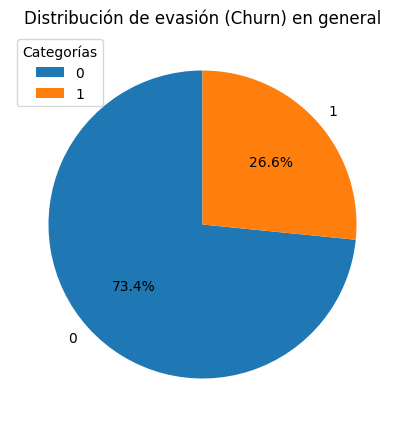

In [ ]:
graficar_pie(evasion,'Distribución de evasión (Churn) en general',archivo='evasion_general.png')

### Evasion por categoria

In [ ]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7032 non-null   int8   
 1   customer_gender            7032 non-null   object 
 2   customer_seniorcitizen     7032 non-null   int64  
 3   customer_partner           7032 non-null   object 
 4   customer_dependents        7032 non-null   object 
 5   customer_tenure            7032 non-null   int64  
 6   phone_phoneservice         7032 non-null   int8   
 7   phone_multiplelines        7032 non-null   object 
 8   internet_internetservice   7032 non-null   object 
 9   internet_onlinesecurity    7032 non-null   object 
 10  internet_onlinebackup      7032 non-null   object 
 11  internet_deviceprotection  7032 non-null   object 
 12  internet_techsupport       7032 non-null   object 
 13  internet_streamingtv       7032 non-null   object 
 1

In [ ]:
churn_por_genero = datos_limpio.groupby(['customer_gender', 'churn']).size().unstack(fill_value=0)
print(churn_por_genero)

churn               0    1
customer_gender           
Female           2544  939
Male             2619  930


In [ ]:
def graficar_churn_barras_agregado(df_agregado, titulo='Churn por categoría',
                                   xlabel='Categoría', ylabel='Cantidad de clientes',
                                   stacked=False, colores=['lightgreen','lightcoral'],
                                    archivo=None):

    ax = df_agregado.plot(kind='bar', stacked=stacked, color=colores, figsize=(6,4))
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Churn', labels=['No', 'Sí'])

    for p in ax.patches:
      height = p.get_height() if not stacked else p.get_height()
      ax.text(p.get_x() + p.get_width()/2., p.get_y() + height + 0.1,
              int(height), ha="center", va='bottom')
    plt.savefig(archivo)
    plt.show()

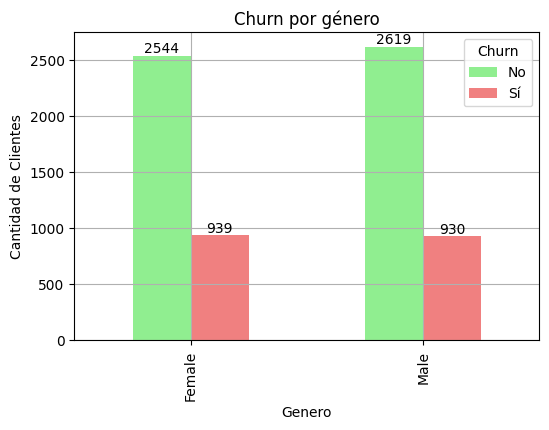

In [ ]:
graficar_churn_barras_agregado(churn_por_genero,'Churn por género','Genero','Cantidad de Clientes',archivo='churn_genero.png')

In [ ]:

distri_por_tipo_contrato= datos_limpio.groupby([ 'account_contract', 'churn']).size().unstack(fill_value=0)



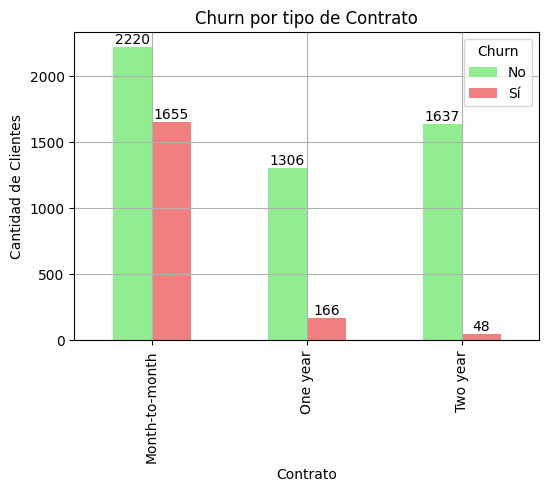

In [ ]:
graficar_churn_barras_agregado(distri_por_tipo_contrato,'Churn por tipo de Contrato','Contrato','Cantidad de Clientes',archivo='churn_contrato.png')

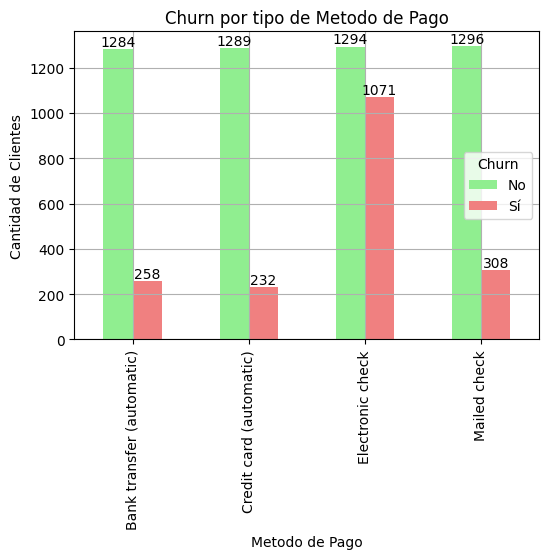

In [ ]:
distri_por_metodo_pago= datos_limpio.groupby([ 'account_paymentmethod', 'churn']).size().unstack(fill_value=0)
graficar_churn_barras_agregado(distri_por_metodo_pago,'Churn por tipo de Metodo de Pago','Metodo de Pago','Cantidad de Clientes',archivo='churn_metodo_pago.png')

## Analisis

In [ ]:
datos_limpio.describe()

,churn,customer_seniorcitizen,customer_tenure,phone_phoneservice,account_paperlessbilling,account_charges_monthly,cuenta_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,32.421786,0.903299,0.592719,64.798208,2.159891
std,0.441782,0.368844,24.545260,0.295571,0.491363,30.085974,1.002955
min,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,0.610000
25%,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,1.187500
50%,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,2.340000
75%,1.000000,0.000000,55.000000,1.000000,1.000000,89.862500,2.992500
max,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.960000


In [ ]:
datos_limpio

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuenta_diarias
0,0,Female,0,Yes,Yes,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3,2.19
1,0,Male,0,No,No,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4,2.00
2,1,Male,0,No,No,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,1,Male,1,Yes,No,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,1,Female,1,Yes,No,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Female,0,No,No,13,1,No,DSL,Yes,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.9,1.84
7263,1,Male,0,Yes,No,22,1,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7,2.84
7264,0,Male,0,No,No,2,1,No,DSL,No,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,0,Male,0,Yes,Yes,67,1,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


In [ ]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7032 non-null   int8   
 1   customer_gender            7032 non-null   object 
 2   customer_seniorcitizen     7032 non-null   int64  
 3   customer_partner           7032 non-null   object 
 4   customer_dependents        7032 non-null   object 
 5   customer_tenure            7032 non-null   int64  
 6   phone_phoneservice         7032 non-null   int8   
 7   phone_multiplelines        7032 non-null   object 
 8   internet_internetservice   7032 non-null   object 
 9   internet_onlinesecurity    7032 non-null   object 
 10  internet_onlinebackup      7032 non-null   object 
 11  internet_deviceprotection  7032 non-null   object 
 12  internet_techsupport       7032 non-null   object 
 13  internet_streamingtv       7032 non-null   object 
 1

In [ ]:
datos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churn                      7032 non-null   int8   
 1   customer_gender            7032 non-null   object 
 2   customer_seniorcitizen     7032 non-null   int64  
 3   customer_partner           7032 non-null   object 
 4   customer_dependents        7032 non-null   object 
 5   customer_tenure            7032 non-null   int64  
 6   phone_phoneservice         7032 non-null   int8   
 7   phone_multiplelines        7032 non-null   object 
 8   internet_internetservice   7032 non-null   object 
 9   internet_onlinesecurity    7032 non-null   object 
 10  internet_onlinebackup      7032 non-null   object 
 11  internet_deviceprotection  7032 non-null   object 
 12  internet_techsupport       7032 non-null   object 
 13  internet_streamingtv       7032 non-null   object 
 1

In [ ]:
datos_limpio['account_charges_total'].sum()

'593.3542.4280.851237.85267.4571.457904.255377.8340.355957.92460.558456.75351.57261.252560.16849.41993.272.12791.525.11306.31215.61849.9557.276.3530.55656.751090.6471.851396.93247.55900.97942.151343.4825.41070.154959.65597.65224.5192991.12078.95630.616111242.456316.2727.85353244.32607.65567.553767.43673.64036.851120.3314.551888.45529.87308.956252.72878.551212.18182.8519.8599.752861.451442.24059.354145.93645.5187.752317.11448.82193.651748.9511.255526.751553.9511476747.35865.055976.9181.653268.051052.47634.2580.263.75190.52401.05511.253949.152362.170.91152.78496.7470.21564.41847.553694.7584017.456825.658309.55605.451972.3533.7844.452111.36205.5855.3633.85474.95848.66471.858127.6676.35864.26049.51582.75198.11098.854039.32438.67113.75576.65371.9167.3219.5273.42555.05223.15165.589.3235.051144.64908.252298.93789.275.947652196.385.551444.655405.86339.33847.6673319.750.16140.853870.37624.24354.453431.752227.12045.551929.35268.45181.5651.43486.651389.62303.351522.76717.98058.5558.85538.55102.35

In [ ]:
churn_por_account_chages_total = datos_limpio.groupby('churn')['account_charges_total'].sum()
churn_por_account_chages_total

,account_charges_total
churn,
0,593.3542.4571.457904.255377.8340.355957.92460....
1,280.851237.85267.42791.525.11215.676.3530.591....


In [ ]:
churn_por_account_tenure = datos_limpio.groupby('churn')['customer_tenure'].sum()
churn_por_account_tenure

,customer_tenure
churn,
0,194387
1,33603


In [ ]:
def graficar_pie_serie_numerico(data, titulo='Distribución',archivo=None):
    """
    Gráfico de pastel mostrando los valores numéricos en lugar de porcentaje.
    """
    if isinstance(data, pd.DataFrame):
        valores = data.iloc[:,0]
    elif isinstance(data, pd.Series):
        valores = data
    else:
        raise ValueError("El parámetro data debe ser un DataFrame o Series de pandas")

    etiquetas = valores.index.astype(str)

    # Función para mostrar el valor numérico en autopct
    def mostrar_valor(pct):
        total = sum(valores)
        # Calculamos el valor absoluto de la porción correspondiente
        valor = int(round(pct*total/100))
        return f"{valor:,}"  # formateado con separador de miles

    plt.figure(figsize=(5,5))
    plt.pie(
        valores,
        labels=etiquetas,
        autopct=mostrar_valor,
        startangle=90,
        colors=['lightgreen','lightcoral']
    )
    plt.title(titulo)
    plt.axis('equal')
    plt.savefig(archivo)
    plt.show()

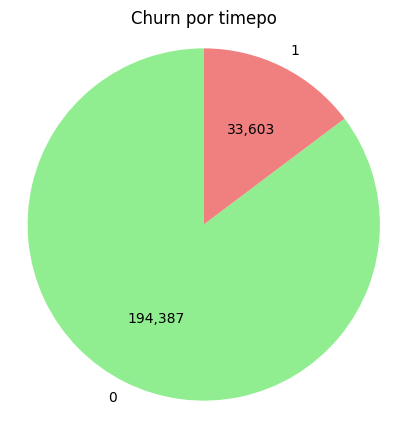

In [ ]:
graficar_pie_serie_numerico(churn_por_account_tenure,'Churn por timepo',archivo='churn_timepo.png')

ValueError: could not convert string to float: '593.3542.4571.457904.255377.8340.355957.92460.558456.75351.57261.252560.16849.41993.272.11306.31849.9557.25656.751090.6471.851396.93247.55900.97942.151343.4825.41070.154959.65597.65224.519292078.95630.616111242.456316.2727.85353244.32607.65567.553767.43673.6314.551888.45529.87308.956252.72878.551212.18182.852861.451442.24145.93645.5187.752193.651748.95526.7511476747.35865.055976.93268.057634.25190.52401.05511.253949.158496.7470.21564.41847.553694.7584017.456825.658309.55605.451972.3533.7844.452111.3633.855848.66471.85864.26049.5198.11098.854039.32438.67113.75576.65219.5273.42555.05165.589.3235.051144.64908.252298.93789.247652196.35405.86339.33847.6673319.750.16140.853870.37624.24354.453431.752045.55268.453486.651389.61522.76717.98058.55538.55102.35465.7475.13364.551234.8355.91510.31982.64524.05318.11231.8525544684.3614.452531.886.05402.6326.657382.85422.66046.1178.8314.6322.9888.75973.35168.65424.25121.256982.53835.556157.63462.14390.255360.752424.54854.3320.45426.65521.95706.3471.74539.6830.256263.81742.51468.753382.346.351992.237350.151414.45122.73366.051271.87965.955398.63343.15198.75897.42511.551398.6967.857589.81790.1544.41284.23474.21430.957542.251709.11421.96526.652674.15170.53175.854297.9540364428.45295.954947.55447.9516.31850.65749.25237.654707.15714.21294.63753.23263.92139.15042.7510366431.052404.852651.15538.35200.2450.454351334.567.1503.251460.852807.16312.92715.31743.051784.54735.352010.95996.451715.1225.753721.95943.65477.61119.351558.71712.91397.65917.45135.751087.760292278.752799459.955755.8442.62566.329627882.54378.94052.44140.18165.1563.054191.451857.75113.1235.83974.7931.554048.95957.1521.85430.651626.43058.151916.26590.8438.92960.1653.94630.258671374.93930.55317.752072.75743.051837.93168.752525960.51540.353894.4837.51534.054542.353600.651013.21401.48071.051028.984.21005.75029.05299.051126.756069.2548.45558.81776.452921.751493.75214.4293.851359.454263.451323.72985.253942.45105.51292.27285.72874.453435.6629.356687.8520.2520.452970.854.654479.28543.255682.254025.61818.94433.367.554335.21312.453437.454613.95576.951278.85212.65902.252157.55625.557153704.151596.63348.16743.556287.32679.71090.651270.25225.653952.457422.13562.52898.956224.85327.25528.454738.3141.176.651537.853409.14575.354798.41882.55723.354122.651125.61446.81529.657238.6330.251108.8319.851401.157332.46668.051809.35639.45321.05993.151832.43877.65382.24323.35413544.275.51077.052310.24442.751372.45689302.451871.151396.25531.557984.155958.85578.54138.9564.652168.91250.13442.81461.15955.154483.957581.5265.3414.1345.97039.457222.75392.656605.55206739.254096.91111.24922.44237.54872.21509.8113.5343.455673.73527.35794.45730.11376.58349.457987.6201.954860.854713.44226.71346.31799.35294.619.55118.251011.8160.855538.82606.355299.651029.8875.55718.12369.34122.94107.251623.4432.255060.9244.8497.34298.456700.055290.451296.15196.35677.0519.651641.85011.152312.5598.52337.451285.82036.551758.95824.75140.43975.9953.65344.25264.36690.75136.7519.05572.856703.55116.6962.254317.3533421815.655886.852917.655333.356479.44663.4414.951266.357993.3139.751493.55876.15646.05780.2527.551397.37726.35391.77035.659536480.919.85505.451443.655935.11267472.6582.851740.84421.951442.65743.54261.25040.2601.25494.057611.557234.85515.45428.45223.152264.55971.254859.252455.05108319.253723.6520.35836.35711.151802.152998808.956780.13801.71978.653471.13804.42106.05605.251756.26145.2407.051389.857266.9519.854164.42198.93090.05475.254475.95811.813092708.219.75321.47932.53023.557337.551463.451263.055168.11672.355869.41139.23686.052423.4990.32509.253491.55383.6569.251347.155597.653778.852462.5519.65294.45695.75690.54513.651255.1939.83948.45244.851067.655450.7202.254964.71901.054304663.553846.75745.3184.054001218.25160.056637.91570.77396.15209.91035.5389.251759.551538.61025.05292.42169.41229.1303.786.052857.6768.452780.65662.253958.25129.34758.8860.85599.252200.7332.653011.657962.21482.37417379.86152.41685.91636.951240.81648.453842.6564.46841.31024.652187.153344.14079.55913.3959.97767.2558326944.5370.5189.951342.155762.957323.153119.9190.2583.3812.42839.95128.6324.85731.851029.356654.18220.41957.11374.35688.568.8349.8483.34858.7683.255437.1678.757344.454408.451133.72283.31536.751430.051248.9147.55130.551588.75818.4595.853670.51224.05487.05264.81272.05712.255969.85445.31087.451360.25579.449.9526077.75515.755706.23181.82619.15195669.55731.4260.91072.62603.1454.05653.15459.6357.157031.36225.41949.47548.675.1206649.94627.8208.454144.81258.15581.760.651548.656936.854520.1549.953512.53972.25490.5543.88404.92815.252936.254631.78477.7702.055445.954616.1220.8573.05518633719121462.64189.72070.752961.455349.91096.65266.66066.551927.34977.26994.6224.856375.23205.63211.91087.25869.91663.54895.1468.35344.5220.35226.26333.46392.8555981028.75220.657511.91637.34839.151379.6531.151506.44983.05524.354200.25137.61614.93834.419.55554.2585709.5202.15398.551789.65207.3570.2598.353217.656424.77002.951110.05450.95348.653629.219.23810.551291.355336.357930.55202.25481.11652.13756.4492849.98936856.95947.753970.41143.81286.056521.9301.553638.253169.5511081618.24126.352348.45948.94614.552553.71068.1519.382.76081.4411.451815.326655121.75300.7152.66567.9780.275.354564.93561.151938.9791.1540.25746.75460.2369.6147.751269.12516.21697.7411.753062.451247.756562.9682.138.458333.95187.355498.82289.9261.3125.95867.138.15654.54911.052000.21336.655737.6134.75352729.152383.61709.151653.856078.751311.65411.654882.82610.65439.754214.25854.8949.851416.27852.4272.351961.650.15355.1487.75178.71514.851427.551277.52939.891.4510574689.152680.1574.6402.854526.85617.35617.85709943.955817.45914.62224.51558.6519.55792937.65360.35333.652877.0596.12743.451841.21502.2561.151794.8422.76683.45305.053270.25620.554952.952409.97279.357015.990.1441335.25032.256441.85184.41192.32090.251441.954016.31021.55415.9797.16468.63808.2256.6514.75702779.25964.91873.7157.653545.05501.356474.456332.756333.84903.2201.71292.654674.4141.6970.4581.056296.75348.81601.52203.16871.7107.64946.05308.11801.11477.655324.52548.654847.358100.55370.2555.71884.6535.91654.854847.055329.552838.557322.56827.5805.22080.16953.49021835.31728.21391.651556.851153.25232.554911.35533.054133.95151.7525.420.25318.61588.25697.651178.756148.455730.15275.91654.754144.950.753008.153121.11405.321.1536.358312.4835.51380.4609.654194.855917.551077.53688.6420.452983.65263.651682.41733.155431.91463.71192.7562.626351505.1595.553566.72395.05406.056786.11888.25674.557521.956293.454681.751490.41303.25119.51718.951043.41885.153126.856921.73580.953349.18033.16388.651011.053656.255330.22003.61928.75125.753371.751331.05886.41077.952070.055581.0525.2555601246.4791.719.48297.56110.751956.41079.45162.151233.25883.35132.25792.155753.257362.9263.055401.91218.4520.43145.153141.72603.3415.42471.65135.355810.9767.96363.454461.853121.479.154953.25979.5249.5570.11222.25278.857789.64914.95438.954060.556840.95571.057751.749.054685.5545.4624.157213.756017.9179.855088.41734.54920.82448.559854300.451940.84386.2741.55784.3522065.47108.261.053880.05444.751183.8403.15144.952024.17321.051203.956692.65233.653416.854299.751171.5388.6857.752832.7541.2531.6812.51191.44014.62722.23254.35134.0538486812.951382.93231.054981.152044.757939.2519.92248.052085720.95546.453180.56578.555607.754422.958349.7735.95817.7279.58317.953442.1561.71177.956310.93019.14657.953088.752924.0542.91119.97719.574.7847.25208.251434.13465.716335948.7849.94009.2109.81074.65651.554250.16841.051937.43545.13886.052613.4733.95775.319.75395.6169.7574.37943.451642.752852.42215.252666.755458.820.65169.651498.351886.424842989.684.752316.857882.25760.051975.851451.11864.2821.62614.13126.451803.76339.451466.17085.56572.852106.32093.410935873.75469.654504.924.72763.3519.95186.051492.13865.453053128.64535.856744.251623.151498.851419.44370.7519.552661.14378.351593.13874.13801.31073.370.451621.354915.15100.35989.05259.6520.35509.37782.85641.253143.651901.65540.951564.051414.65494818.87713.551240.152447.45727069.32553.351284.27511.31416.755289.05130.153985.3538.8717.954929.55600.255760.6519.9929.454543.951600.957559.552510.720.4548343190.6544.753340.556139.5173.15324.26951.155780.79782807.6520.3335.653199469.254172117.2718.5599.457118.92948.625.75958.255448.61629.23540.6520.751939.35387.9524.5213.3525.73551.65163.61387.45273.252191.72560.15986.55641.353608104.31470.05122226.5550.152364419.94730.64805.65908.553251.3371.46881901.257567.2780.15601.65222.35270.26997.3253.86028.95238.1583.476.95927.14896.357616341.61748.554222.95238.11348.51357.1475.25608.45376.4611.45733.553334.92130.551362.85923.120.051023.95543921.31679.45025.853314.15220.453775.85865.85572.26449.15199.753988.557.4693.453161.41218.254378.81363.251439.352471.2559.555016.25124.424.75308.719.555733.43634.81215.651383.66667550.3140.1227.455388.155913.956194.11841.91041.84786.1309.253132.75146.656770.51462.0544.556052.25154.8233.91468.91267.23358.651406.651651.9569.953147.155514.952038.76501.35140.955566.44312.5112.75788.354469.15483.95153.53593.81166.71175.854254.14959.15473.92333.85781.42107.151801.918.896.83870477.05995.355468.953301.055965.951253.5293.151375.47732.652341.553015.755991.056470.1220.457430.756632.755883.85467.72799.751524.852964.81993.252395.75676.6539.85377.55158.952263.41009.253478.157530.82658.81584.8572.4520.052522.450.6601.55196.9113.954620.4190.14003.853503.51924.1331.85944.65283.754539.353848.825.855941.05478.755815.15248.4113.5246.7942.9594.4228.651759.46474.465951336.1929.3134.620.313871691.96018.657082.85810.3910.4582.91296.85899.85274.354639.451911.51230.9467.152583.754018.55485.9188.1294.56991.66218.452531175.66669.45189.456425.651718.354137.21198.848.352546.8530973928.35409.754779.4531965175.33741.856236.75930.9501.21415.853009.53782.4478.11339.8313.43635.156844.5268.4890.35239.452909.9561.452088.052007.256631.857511.65576.74677.115072538.22031.951107.25860.76352.41269.6261.655898.65963.952727.33533.67061.65132.4264.55296.157746.720.22748.71301.95244.45747.21459.35276.57845.88337.454438.24890.51813.355893.9343.45401.51441.651682.0574.21378.452093.9678.82633.3153.31121.051183.05154.3813.451912.155696.6592.751447.93886.8519.23145.92414.551386.84747.51122.4413266.81273.32085.457288.46314.351173.557133.11992.8555.7393.452211.858908894108.15210.65447.751158.857405.5109.61329.152509.95257.6343.6711.919.2675.654871013.65135.15251.25625.652058.56302.882502548.556448.853121.453043.61381.84116.97661.875.454295.352497.2239.0545.252237.555969.95788.05151.75371.6145.151426.452721620.85231.25550.124.42640.555023227.352065.15730.43865.6495.151760.253720.3543513961160.75499.4609.05552.651071.42349.81083.7676.15985.054868.4610.21006.93265.9534391546.35743.3467.15620.755222.3134.053282.75294.21177.054859.953398.9954.91189.97985.96239.051732.62292.7527637920.755.38126.65980.351167.82324.7504.24209.95358.053765.05155.9400.34741.454266.432524600.955959.34889.2165.351250.85269.65938.656597.25416.453496.34375.83210.3545.55505.955576.31938.056652.4550132077.955430.353958.85867.355.051445.27966.91373.055720.354368.951064.953554.6348.1520.35482.842.45101.12595.257349.355833316.11523.46741.151681.67082.51031.787.32782.4416.4504.051752.451445.956031201.65592.655882.753505.11297.8559.21389.356993.651334.4520.751051.91151.056201.95776.255321.257895.155839.34698.051035.7710.058078.193.55193.051377.719.457049.5253.91067.05926.25621.85156.192.051821.84179.1516.151261.351424.437846875.352184.612523906.72976.956067.449.3106.93479.05129.219.751031.14307.1304.6561.151291.3242.4122.98175.920.41714.552021.27246.151114.555251.751232.92483.652048.81317.954119.465.953632162.45246.25150254.56674.656152.37082.45908.157508.551583.5670.351781.351277.751079.65456.856506.152747.2564.35127919.657677.4565.751474.98152.34707.854234.15893.285.1795.15565276.120927.158308.91715.15761.953521.7280.4340.357854.91901356766.951321.331.2552.72474692.551640299.754228.553735.453162.657848.5358.155785.657869.05767.551784.971.256758.452434.451216.65776.457991390.858289.22796.353579.15571.75693.34385.054676.7336.152965.751496.454310.355165.71714.95770.54374.55256.751265.652029.0519.754747.851932.751110.539.35997.12049.054563452.84447.553509.43944.51641.31643.552244.954543.15894.344.058013.55202.96719.91680.25838.73791.61123.651355.11414.820.6117.95467.5168.95688.45695.85525.55661.55111.41388.453069.452862.555511.652028.81093.21910.755309.55219.655893.951411.353766.2926.2520.82809.05432.51551.6138.851580.16849.75152.3220.41412.42398.47291.756375.8401.957576.74828.05522.95639.7141.75364.8267.3549.52406.15025.818154619.556463.15275.72181.754807.45981.453591.252042.051301.1212.43682.45417.53470.85683.64322.851315.3514424103.93815.42054.4574.352492.2573.13836.37623.21497.9801.3854.454747.27039.05244.75399.252020.91785.654154.55174.754304.54085.7545282181.5544.662531007.8901.251066.156118.951672.15442.455986.45196.751862.95764.72511.955925.754124.651295.46713.21769.63273.955580.825.251718.2435.456989.7535.35826.16751.351336.8107.1520.955163188719.2174.4546.4384904.853452.555774.553330.1286.8298.789.356000.11322.851923.85445.85955.758035.95547.819.851096.6521.355980.5596.85071.94084.351539.81080.55784.451189.41403.17843.553822.45389.8786.5295.553370.21710.9846.8198.25370.4218.557195.35300.4551.32209.152203.71818.345461563.95498.11125.23023.65533.65718.21336.154968337.91395.051315982.95161.155038.4524.94284.6544.753899.058468.23023.85365.87173.152879.92549.175442142.87842.371.24510.8408.56384.54667321.7943.85750.16856.451655.355629.15433.751237.384.2554.053741836.92421.6918.75157.754453.31905.4239.75278.4331.66383.9962.91510.51307.85629.551358.61259.35235.24993.4903.77610.13886.45600.15135.2291.45251.65763.16423992.71414.23255.351022.52136.92424.455676854.91444.051594.75731.33375.91156.555826.65973.95645.82191.15761.855000.051509.9999.8172.3584.41165.9345.51129.3531573042.256164.778.311854070.952813.051710.15500.14454.253342.45181.8405.7212.33482.85649.41540.051174.351724.152879.2369.15550.12911.51671.62762.75318.67245.91859.53027.65471.55905.551988.053950.857467.55433.53419.5788.620.35613.953000.253283.051244.8602.91026.351201.65580.11745.5285.23958.251088.256430.9711.955315.81713.13915.41500.520.052016.34456.357758.94861.45832.32724.256457.155265.52431.95580.83250.456912.74939.25342.36858.91992.553930.61742.4561.05170.934.75967.91549.756367.23321.35390.445.21872.2917.15540.05316.9550.35417.654634.352172.05599.34024.2363.156614.9100.96094.254445.33454.655.552234.55144.35804.855016.655034.05194.555812890.51902302.35727.85480.256816.954693.24107.32570.2232.1144.8637.55368.856705.71173.3520.155831.21417.994.15457.32586174.7346.45159.2635.9387.47714.651020.752215.452723.15743.7599.95185.27537.55236.41326.35476.82901.81326.257346.21820.9835.52696.552495.152971.76042.77210.851023.851267.958046.85439.26792.455588.81971.151849.21875.256643.55841.35567.84054.23355.65413.25196.4130.53166.9956.65185.47862.254557.53377.83665.554264.25828.853875.4300.4362.6555.47905779.6713.64576.33751.151033809.255714.21964.637704287.27898.4584.64858.75044.81905.71679.651498.55171.45969.85181.65923.85780.1330.6199.456241.351611.652288.74392.51646.4534102659.451701.65605.9817.951458.11010195.65535.054464.85969.32308.6577.151402.25720.053687.85207.45138.140.9382.86503.21118.83983.62281.61054.83096.91983.154733.1335.955956.85762.453623.951647243.654391.451968.11061.64902.8270.151923.53645.6647.52272.8347.655686.470.73187.65866.45914.48182.75273.2575.55477.551281.251228.651908.357009.56914.954532.3191.12570.21864.651355.45265.7545.7536.83838.27076.35217.14042.26889.81493.14149.45685.55920.520.656034.85168.51381.2921.553112.053237.054671.71673.42357.756342.75083.553440.25141.653876.2244.1638.552588.952424.053512.153574.52686.054284.24494.6545.8216.458331.953221.254869.52168.156557.75870.2559.2536531212.851311.75406.954759.552768.356770.852239.4335.753082.12030.757467.52896.61410.2590.05202.3681.47261.753460.958003.8759.551782470237.27875143.6547.76989.451600.253772.65945.74370.25755.43346.88192.6865.1653.25617.653919.156536.55206.553994.055894.53923.8274.75199.83165.61113.951476.251952.252196.452053.054345934.154348.148.754664.152626.15595.056511.8149.052633.41664.32871.578.96603.82146.53353.43959.15810.453510.32149.052536.554884.85929.24308.251958.956325.256716.456369.451024.73423.5493.951071.65936.553088.25827.73893.64719.754917.756068.657470.1874.22621.755043.2936.851750.75224.56176.63418.28022.852651.22495.2418.3907.05605.755980.75270.63990.61266.41381.84193.43566.64415.755234.958100.25755.61539.752929.754473.4553295396.255295.71789.95475.97047.51442.62302.35367.956487.24297.6158.351346.21021.75125.524.21522.65174.21513.675554664.5105.6908.7537784113.7452.27665.874596293.75678.22162.62298.55272.953027.254174.35523.12404.154946.7180.73281.654555.2383.65875.35262.3548.91719.155229.82351.451739.6638.951057.551164.051130.853851.457386.05139.25838.5258.355610.151049.053965.051461.455200.81375.61431.658443.71336.96994.84641.15542.553953.15772.4851.2373.52719.24976.15533.92033.85697.77142.52157.35595.35999.85419.43251.853021.4555.256385.95353.651174.84507.15438.05682.15442199.052453.3829.31046.2265.81453.1375.25734.6235.05844.4569.9234.85775.62571261.456891.45223.919.6535.12209.751131.5554.457472.157049.751889.54245.555846.652375.2482.252033.051866.451058.1143.9312.7228.75515.451802.55765.151302.653795.452459.868.2949.8178.851879.25644.51737.455070.4177.44849.1670.651187.054916.41039.456401.25130.255038.152640.55492.13339.05865.752723.75777.31253.652032.36929.42259.3517257657.45411.45189.755154.57412.255646.64013.86563.41410.252845.154220.356895.5369.053238.4973.651766.75978.624880.05610.755832.6593.453729.63954.168.456416.71299.12633.95146.66397.61253.81500.255481.257365.75502.556669.051898.13846.351654.7697.253902.6494.95313.61545.43038.556033.1938.95150.752023.55260.7530.05408.257334.055357.751304.82839.45592.6538083103.251210.34134.77553.61215.15232.94804.657554.05757.9557.45301.11274.455717.853541.4419.3540141115.63035.355432.25618.31689.451834.152243.91215.451170.51114.85892.71955.4655.31730.654973.42888.7475.11386.9552.9123.651782.055174.354040.238.2544.45515.752893.4163.220.25607.72773.9415.16520.8888.65163.551857.853161.25563.6515674534.45657.57112.1528232979.21411.219.54213.93128.8593.28424.95536.53472.05147.8683.75587.7654.5542.74764930.05865684.855553.251816.751702.91608.151392.251245.051033.93045.757854.151559.25971959.51537.92245.47853.7109.52271.8596.85219.357609.756880.851160.4587.96588.95862.444732188.540396230.13726.153532.852198.31698.557578.052282.95779.27990.051367.751340.12674017.451474.352184.85695.0520.454615.94116.86254.45570329.9802.358476.52966.951940.854976.15716.463844.754131.21798.9440.23204.4399.451830.15129.45314.45299.42343.85899.45118.256998.957240.657397998.11433.82894.55527.51423.351498.657107488.252535.553691.2194.2849.11234.63292.3331.35436.94808.73089.62854.953674.951595.5505.921935861.752419.55279.31082.754919.73414.651755.354819.755243.05830.86237.0519.7545.852215.42564.952094.9382.2275.4607.31429.65404.352104.55518.751198.05436.244.15669.453975.72274.125.356300.853888.65119.34746.056519.754166.35759.352907.3560791489.3426.357114.252627.35100.21859.155.2546.3814.754126.23134.76347.556109.651579.7402.5692.554753.851783.6164.63334.9527516330.44729.751566.751170.551322.55357.6958.16841.45497.62884.977.64192.152234.957251.76424.252326.055791.85996.856671.71226.455460.24484.052479.255224.95877.357365.3202.31736302.852619.2562.8117.81406.9609.16511.255844.652627.2186.1522655522.75270.61867.719.95507.43871.851783.751195.257880.251045.257752.055386.51620.27707.7216.22970.34690.654653.257138.65389.953771.56172704.31070.256613.652545.75505.951363.45852.74179.21049.6422.4107.255903.155645.8232.352094.654586.156328.7816.82656.396.856185.81554.910243047.157447.7107.056411.2520.23877.955265.23487.9557.5238.51540.21288163.76779.056376.552688.85795.654089.454985.9485.22320.8855.11846.651394.55521417.755968.46129.65593.855617.951929.957849.85683.25789.2374.819166365.357030.654003186.37244.720.291.41398.251221.55255.51155.62201.75510.8754.56129.25031.852878.751971.5411.61657.41638.72835.5109.3624.6350.357110.75780.853068.6348.8543.8831.752117.25294.95911.6615.353084.9566.51110.3580.957679.653772.53365.4469.65688.2664.42576.878.251282.851216.353603.45394.1204.551152.8679847.85436.451043.325374917.93778.1690.254285.819.13548.32531.41752.65934.82979.320.445.31086.751285.055067.451567.551354.45289.8864.551672.12208.05966.25340.44904.22018.4789.557878.31614.054145.251501.756725.31810.85892.151440.751156.351209.2592.75161.451185.954361.55612.15623.7123.05308.056227.52032.32684.35167.2184.151043.83327.05341.358529.543.851688.9716.119.95791.16093.330.551423.052344.51686.855420.65150.6245.153389.252151.64448.81270.554860.355150.551205.52016.451794.655950.23953.7290.55231.453244.46301.71332.41003.05302.67132.15301.92908.27104.21219.852933.957181.95845.256435.252220.11181.75931.97303.056109.7520.951195.951614.24615.255931.754025.563.67171.7550.61267.051723.955598.32440.252595.854995.351097.153236.35386.57634.82301.154932.5723.3958.153624.35684.055744.351211.65854.91025.151821.21288.75114.151941.5356.1611.65467.855586.456819.45106.83887.251798.651171.31260.76033.3111.05964.354692.95534.71874.45262.051505.4561.357297.75246.75064.851990.5109.255749.81208.64300.83437.5573.151432.55136.051620.458248.5608.15678.453646.81530.61208.155461.4534.85264.253756.4527313021.3641.156223.850.71199.44997.51493.24549.453122.44158.252623.65648.653902.454577.754984.858436.253488.151004.7554.359315459.2177633.65496.9384.258196.4259.41238.65454137.1184.951275.61379.81553.21848.8955.62789.733.64362.055589.35265.55768.053273.89436306.51764.751525.351667.254509.52689.352391.15816.8109.21140.051787.35156.851327.41412.652317.12015.81337.454920.552669.456586.857806.57475.1238.5773.26029.97149.357168.251672.35235.651001.51734.653572338.353208.651732.952656.77008.1543.153457.451033.95637.4305.553729.752754625.052369.77922.752210.22347.851027.257028.52019.832971478.85280.354594.65417.74040.651387.353512.9466.6154.557795.95608.54744.351263.9864.851359.51494.5135.75741.41051.056602.91566.91215.8203.95970.4218.520.051914.53173.356096.9422.35059.754885.85950.751597.4882.551497.054652.41233.153263.64097.051128.11830.053605.61348.953249.4283.952647.21345.65825.15315.13590.27774.056976.752847.2405.63418.23694.45162.3612.951275.652552.94238.453274.353662.251124.22356368.21672.14230.251663.755012.351311.3702.94855.355602.251992.95617.157711.2522156638.351441.86153.85755.52390.45124.454671.657544.3827.3834.77188.5798.21706.4562.91563.91686.15772.856444.051505.355714.2573.452766.4819.9520.9527.352188.455703.25199.8554.54155.954188.45500.645.158041.65250.8486.051743.91297.352462.65073.12688.452618.3268.451886.252088.45323.15229.42296.25876.7519.651103.251046.5996.9519.41936.856350.519.15587.14069.920.299.649.751313.25436.6445.95411.15696.8120.25590.356735.051630.4377.85589.251222.652204.35159.351790.6214.55178289.054949.12313.8493.65307.6129.15724.6597.53769.78375.051867.6769.124.4279.26707.15198.51058.163.752415.95123.81165.55155.3564043626.35273.24760.349651438.052404.14862.5161.45541.56510.455809.75887.351134.25226.9530926548.65827.454859.11008.74236.6116.680.5549.83581.44900.65717.5662.955099.15958.452657.553861.451423.6570.35326.83357.95139.651505.96179.35255.551796.553415.252801252.854616.05106.231681559.156697.351729.355442.051454.251288.31356.35163.31017.357455.454508.65220.4558.3503168.35412.64925.35265.457031.4525.15358.56004.855431.4520.55323.45251.61411.95589.45936.7886.75730.77998.820018672.455711.056590.53187.654972.189.256589.64224.73369.052793.5529.852275.11653.45538.2979.053739.83008.551183.05686.9519.551416.58058.851520.12221.551468.754368.851413280.854735.2378.61573.9519.453833.953729.754824.45810.85111.655471.75369.25520.13450.151016.7330.8381.22413.0533.74217.85731.853895.351263.851092.35226.85585.43539.251857.251725.956561.257556.92830.451547.35176.31614.7628.653478.753171.61337.51843.052684.85153.953091.751643.253778.24688.653363.85974.33829.751424.93824.2726.120237.31341.52647.16398.051810.555264.52599.951205.051108.67251.919.655637.854549.05150.3590.051344.57129.453094.056292.71529.45297.35961.4857.82974.5743.33627.345.351325.8594.4560.656843.15629.553007.251304.853107.3232.43480.354138.74784.4554.7130.55895.454599.1550.751840.75574.5921.41299.81188.21421.751345.754326.849.651081.25393.152877.9520.3684.4217.5275.75825.57320.9217.454807.352263.453966.33597.53641.51857.3494.91778.51261129.619.751493.24525.81066.947204674.553581.66668.351882.81007.93725.56362.3585.53077720.11436.95220.7519.95552.05146.4839.651868.41293.85727.151117.551242.255594475352.65434.81195.75660.0542654905.757839.851813.13541.119.31020.21683.78244.36721.61218.654039.5705.45383.553003.55244.453109.9460.251982.11747.21559.455798.3568.2553.4110.151292.66130.855930.056075.94889.383.753971797.751859.23565.651838.151611.151151.55659.453529.952386.85332.51683.64965.15708.2330.8222.6539.8369.15835.5708.83838.758425.156382.554738.852379.1422.54275.757748.751424.68016.62341.55231.34589.85487.054888.24055.571.16991.91699.151245.6306.052345.5520.2563.54060.91031.43425.354931.83465.055632.5549.856496.157181.25490.652545.7419.7828.27737.55183.15225.852427.1659.35211.956891.4811.657413.555681.11777.6428.71093.44541.93883.31108.25443.652737.056132.71001.22193.21013.357565.35565.35946.95449.3906.85284.93684.95255.66065.31090.1514.65166.2311.6451.554299.955924.41734.21014.251252730.8551.65347.956869.7425.1458.1701.312863708.41679.253055.582.153952.65452.55689.356859.0544.5541094487.379.054921.22897.952075.11022.95533.56688.951137.051714.956126.11404.6520.25470.64732.35571.155498.28306.052006.95916.151706.45434.57493.05833.554303.65266.956058.951004.351258.352130.452490.15828.051652.951738.92540.15692.651500.95498.255552.53996.81399.351110.051871.851336.35322.52692.75392.5385.55997.75287.853399.85246.66925.920.451370.358425.37658.3356.6521.055253.95597.91184800.31328.3547.951700.91138.82638.1168.654519.570.67982.55229.453522.65249.42494.65463.6144.153921.1299.31930.91023.75525785.75947.43557.729644299.2314.955682.254811.6484.053618.71225.655017.71597.05451423.856309.656754.353956.71079.051952.85611.7284.3174.65245.155193.219.451193.556185.153131.83058.36733.15835.152208.75250.14136.4394.8558174903.151423.1593.46322.15196.12568.155567.451032.056767.13373.41305.95198.61790.3550.05861.851434.68405369.31495.1356.15914.41094.353616.256885.751253.155497.055237.45528.9842.257159.052227.81411.657111.32421.752820.653673.15401.85806.953246.45707.58332.151147.851345.856300.151102.4632.2206.151112.31521.23403.44264.63420.55068.0520.457388.4519.81612.24178.657317.16141.6519.51893.52768.65294.9351.55746.051782.4535.553260.1749.354523.253090.656555.21642.75548.84551.53921.319.558399.15454.652802.331.9313232.54492.920.7512.251652.44176.71424.23650.358277.051221.653901.254391.25163.76954.151626.055601.4771.956130.954018.35672.71264.2101.654869.357159.7148.056096.451800.052790.658164.13379.252062.152356.75118.45916.953974.151696.2654.85741958.456161.92425.451.251042.654331.444.81011.57689.86055.553320.644.91188.2562319.66518.35839.4445574.351793.251123.151316.93089.12078.55858.61825.5568.85668.85184.11778.72882.2541.85424.751620.252258.25429.55101.91319.95357.720.051874.31378.752433.56585.285.163821167.63085.3549.84982.5583.35564.856311.21797.174.36725.53410.6708.2350.11574.5532.13177.2540634801.15985.753645.5593.05564.35790.7966.553242.5103.71677.8513887325.12538.05546.854863.852429.13794.56393.654113.153887.858065.651298.71985.153582.42964.057281.61837.78012.751237.65903.8689.751004.5475.73713.957334.056297.65401.3529.5987.951745.23043.78564.753320.752779.55746.751055.9754329.7549.55313.457133.4525868.11309.157711.45951.551669.4108.651364.756744.24566.5435.2552.054664.22427.357919.8784.251161.757053.35867.32513.51082.85233.25255.35340.851573.053131.5544.954162.05970.851261.75535.8157.55469.85930.95452.351303.5765.45411.251756.620.158310.556688.12096.1851.82673.456823.48477.674.14577.9651.518.851393.6764.55488.653035.8387.77629.853858.052907.553313.42108.353617.1359.43460.3152.9572092570161.657840.65680.953.052018.1739.9537.35162.551581.957227.453645.751885.1540686126.152283.152928.55763.151763.559261856.4777.354729.314067881.25215.252021.356538.454669.2873.41212.252753.81505.05740.554447.75493.4999.91415664.41249.2550.63116.1519.754914.853.55225.555555.324193094.6557506001.452092.91391.1520.38093.152603.955655.451806.352249.14267.151274.055878.937.23756.452034.251190.55515.82958.95601.61319.85372.453019.7116.85493.417534451.85736.81821.954495.65827.051012.41146.053533.6587.4781.253571.64786.152959.82443.31443.652774.55444059.854805.34318.356083.1284.355215.1424.54459.8770.48124.24754.345.6935.95064.454309.55246.31078.758166.8189.1735.5113086.355647.952025.14326.253413.252007.853139.84480.71235.5583.756697.24845.48312.752654.052134.3717.3518.31203.9729.952681.15335.41533.86640.7355.1485.251673.86151.91665.2486.25194.05176.26373.1116.958240.852727.82006.14428.61346.93857.14991.52322.851601.22460.35309.41654.61943.973.05223.61070.53483.451750.8519.25288.35739.355919.353882.31931.3320.43990.755036.9470.25757.2581.85631.41678.05221.16838.61400.366897069.254730.92236.2446.86293.2756.44554.85197.453.151790.84904.2512076045.919.1237.74478.852151.6943.12848.45990.456155.4461.33419.32083.13161.65012.11654.457953.255600.155705.055731.458061.5824.855437.75190.255661.76841.44872.356595.9551.956273.4786.3970.554456.65581.7161.954804.754820.552835.91268.853005.8928.41191.21048.4592.5931.751149.653190.25700.45252.752212.552156.25720.451765.95253.81242.25979.7679.8595.51356.751.24233.955375.156019.35465.85897.75483.154747.656565.85658.11161.751588.72076.057283.251126.351054.754459.156549.456962.8592.251620.21713369.253687.75324.151980.31165.6879.86794.7589.751022.66460.552479.052911.81385.85989.0570.0570.22441.73097.270.6412.5582.852444.25433.951013.05507.9813.37074.41275.853645.05110.0519.4677.9137.252723.4229.78086.449.71328.153297241.3653.956056.9295.65973.1471.35963.955125.57051.951519117.051816.22796.451842.75728.554449.758129.34159.453973.24916.952997.453946.9398.554156.8616.932.73649.62230.855969.3701.05214.7520.558264793.8360.55815.556910.3788.551442511.32333.055025918.73219.758670.1522.356038.5579.85317.8450.652276.1927.6548.620.51025.153306.851388.75339.93213.75587.451057.853072625.254891.55311.8563.15797.252309.556223.35822.32683.26782.151790.65336.73024.153914.054014.28594.4147.52192.95484.43810.8150.85562.7692.351070.7937.1153.81615.11374.2465.457887.254748.7845.63532.251050.5316.245.32575.456860.63827.955.454282.45727.45666.754016.21275.72919.854016.752391851.451912.8574.35223.757475.854590.35309.35310.67459.051861.1673.27806.6566.18075.35418.25470.21183.22339.3472.25426413732440.251662.053845.45672.21327.8524.47383.71305.952896.553517.92475.351826.76256.29163211.25981.651948.354327.53275.152044.958547.155468.452180.55552.194.51516.62473.95215.255611.751287.85804.2566682658.45060.852664.3383.65487.951559.34263.4457.17517.77382.2520.051725.4367.554111.35129.553625.21372.91517.54871.456171.2856.518.94018.05633.45742.992.754627.653707.6'

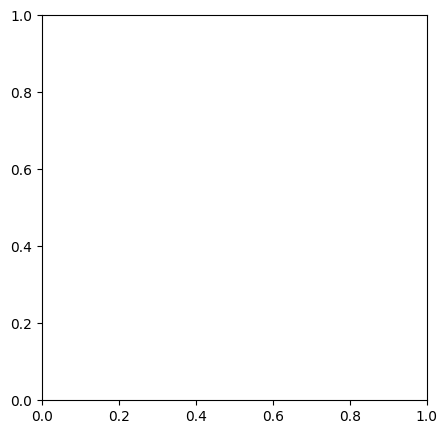

In [ ]:
graficar_pie_serie_numerico(churn_por_account_chages_total,'Distribucion por total gastado',archivo='churn_cuentas_totales.png')

#📄 Extra-correlacion

In [ ]:
datos_limpio.info()

In [ ]:
# Copiamos el dataframe
df_num = datos_limpio.copy()

# Convertir a numérico las columnas que deberían serlo
columnas_numericas = [
    'customer_seniorcitizen',
    'customer_tenure',
    'account_charges_monthly',
    'account_charges_total',
    'account_paperlessbilling',
    'account_charges_monthly',
    'account_charges_total',
    'cuenta_diarias'
]

for col in columnas_numericas:
    df_num[col] = pd.to_numeric(df_num[col], errors='coerce')

# También asegurarnos que churn es 0/1
df_num['churn'] = pd.to_numeric(df_num['churn'], errors='coerce')

# Eliminamos filas con valores NaN para este análisis
df_num = df_num.dropna(subset=columnas_numericas + ['churn'])

In [ ]:
correlacion = df_num[ columnas_numericas + ['churn'] ].corr()

correlacion

#📄Informe final

## Introducción

El objetivo de este análisis es entender el comportamiento de evasión (churn) de los clientes de TelecomX, identificando patrones y factores que influyen en la decisión de los clientes de abandonar la empresa. Esto permitirá tomar decisiones estratégicas para reducir la evasión y mejorar la fidelización.


## Limpieza y Tratamiento de Datos


Se realizaron los siguientes pasos:

- Importación de los datos desde un archivo JSON en GitHub.
- Expansión de columnas anidadas (por ejemplo, información del cliente, servicios de internet y teléfono, cuenta).
- Conversión de columnas numéricas a tipo `float64`.
- Identificación y manejo de valores faltantes o inconsistentes (NaN o strings vacíos).
- Normalización de nombres de columnas para facilitar su manipulación.
- Transformación de variables categóricas como `Yes/No` a valores numéricos (1/0).

In [ ]:
datos_limpio.sample(5)

Se exploraron las siguientes dimensiones:

- Distribución de Churn


En la **Figura 1** se observa la distribución de la evasión de clientes.  

<a name="fig1"></a>  
![Figura 1: Distribución de la evasión](https://raw.githubusercontent.com/d4vid2025/challenge2-data-science-LATAM/main/evasion_general.png)  



- Churn por género


<a name="fig2"></a>  
![Churn por tipo de contrato](https://raw.githubusercontent.com/d4vid2025/challenge2-data-science-LATAM/refs/heads/main/churn_genero.png)

- Churn por tipo de servicio


<a name="fig3"></a>  
![Churn por tipo de contrato](https://raw.githubusercontent.com/d4vid2025/challenge2-data-science-LATAM/refs/heads/main/churn_contrato.png)

<a name="fig4"></a>  
![Churn por tipo de contrato](https://raw.githubusercontent.com/d4vid2025/challenge2-data-science-LATAM/refs/heads/main/churn_metodo_pago.png)

- Distribución del total de cargos mensuales y totales

<a name="fig5"></a>  
![Churn por tipo de contrato](https://raw.githubusercontent.com/d4vid2025/challenge2-data-science-LATAM/refs/heads/main/churn_timepo.png)

<a name="fig6"></a>  
![Churn por tipo de contrato](https://raw.githubusercontent.com/d4vid2025/challenge2-data-science-LATAM/refs/heads/main/churn_cuentas_totales.png)

## Conclusiones e Insights

- Alrededor de 73% representa la cantidad de clientes que se ha quedado en el servicio, de acuerdo al gráfico de Distribución de churn en general [Ir a Figura 1](#fig1) .
- La distribución de cliente que permanece y no pertenece se dividen equitativamente frente al género (la mitad con varones, la mitad son mujeres)[Ir a Figura 2](#fig2).
- La mayoría de cliente son mes a mes, sin embargo de aqui también se puede ver la gran mayoría de clientes que se van. Y se puede ver que los otros tipos de contratos los clientes no se van (se puede explicar por el largo plazo de los contratos)[Ir a Figura 3](#fig3).
- Respecto al cruce entre métodos de pago versus los que permanecen y se van, podemos ver una gram mayoría de los que se van son de método electronic check [Ir a Figura 4](#fig4) .
- La mayoría de los clientes que permanecen generan la mayor parte de los ingresos [Ir a Figura 6](#fig5) .
- Existe una diferencia notable en la evasión según el tipo de contrato/métodos de pago [Ir a Figura 3](#fig3) [Ir a Figura 4](#fig4) .
- Por lo tanto los clientes con ciertos tipos de contrato o sin servicios adicionales tienen mayor probabilidad de churn [Ir a Figura 3](#fig3) .

## Recomendaciones

- Las campañas deben ser orientadas equitativamente.
- Revisar la estructura de contratos y servicios adicionales para incentivar la permanencia  y de acuerdo a la data enfocarse en los tipos de contratos de un año y el de dos años ya que es de donde menos clientes se van.
- Revisar el método de pago de Electronic check, donde han mucha evasión. O tal vez desincentivar su ventas por ese medio.
- Los clientes que permanecen explican la gran mayoría de ingresos. Casi el 80% del total de ingresos.